In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
## Load idx2class csv file and load it into a dictionary
idx2class_csv = '/mnt/disks/large/data/labels.csv'
df = pd.read_csv(idx2class_csv)

idx2class = {}
for i in range(len(df)):
    idx2class[df.iloc[i,0]] = df.iloc[i,1]
print(idx2class)

{0: 'culture::abruzzi', 1: 'culture::achaemenid', 2: 'culture::aegean', 3: 'culture::afghan', 4: 'culture::after british', 5: 'culture::after german', 6: 'culture::after german original', 7: 'culture::after italian', 8: 'culture::after russian original', 9: 'culture::akkadian', 10: 'culture::alexandria-hadra', 11: 'culture::algerian', 12: 'culture::alsace', 13: 'culture::american', 14: 'culture::american or european', 15: 'culture::amsterdam', 16: 'culture::ansbach', 17: 'culture::antwerp', 18: 'culture::apulian', 19: 'culture::arabian', 20: 'culture::aragon', 21: 'culture::arica', 22: 'culture::asia minor', 23: 'culture::assyrian', 24: 'culture::atlantic watershed', 25: 'culture::attic', 26: 'culture::augsburg', 27: 'culture::augsburg decoration', 28: 'culture::augsburg original', 29: 'culture::austrian', 30: 'culture::avignon', 31: 'culture::avon', 32: 'culture::aztec', 33: 'culture::babylonian', 34: 'culture::babylonian or kassite', 35: 'culture::bactria-margiana archaeological comp

In [121]:
results_dir = '/mnt/disks/large/output/cnnrnn/test/test-03/test_prediction.csv'

In [122]:
# Get predicted labels
df = pd.read_csv(results_dir)
pred_str = df.iloc[:,1].tolist()
ids = df.iloc[:,0].tolist()
pred_labels = np.zeros((len(df), 1103))

for i in range(len(df)):
    curr_labels = label_str[i].split(' ')
    for lab in curr_labels:
        pred_labels[i,int(lab)] = 1

In [101]:
## Get true labels
#test_label_file = '/mnt/disks/large/data/train_split/train_split_val.csv'
test_label_file = '/mnt/disks/large/data/train_split/train_split_test.csv'
label_df = pd.read_csv(test_label_file)
orig_label_str = label_df.iloc[:,1].tolist()
orig_labels = np.zeros((len(label_df), 1103))

for i in range(len(label_df)):
    curr_gt = orig_label_str[i].split(' ')
    for lab in curr_gt:
        orig_labels[i,int(lab)] = 1

In [102]:
from sklearn.metrics import fbeta_score, f1_score
f2_samples = np.zeros((len(df)))
f1_samples = np.zeros((len(df)))
for i in range(len(df)):
    f2_samples[i] = fbeta_score(orig_labels[i,:], pred_labels[i,:], 2)
    f1_samples[i] = f1_score(orig_labels[i,:], pred_labels[i,:])

In [103]:
print(f2_samples)

[0.18518519 0.         0.         ... 0.16129032 0.         0.        ]


In [140]:
idx_max = np.argmax(f2_samples)
print(idx_max)
indices_f2 = [n for n,f2 in enumerate(f2_samples) if f2 > 0.75]
print(indices_f2)
indices_f1 = [n for n,f1 in enumerate(f1_samples) if f1 > 0.65]
print(indices_f1)
f1_max = np.argmax(f1_samples)
print(f1_max)

4113
[2000, 2762, 4113, 5369, 6194, 6371, 7854, 9504, 10652]
[3730, 4113, 7826, 10028]
4113


0.6666666666666666

In [141]:
# Function to plot original image and predicted labels
import os
from PIL import Image
import skimage
import matplotlib.cm as cm

def visualize_pred(img_path, pred_labels, true_labels, idx2class):
    image = Image.open(img_path)

    pred_labels_list = np.argwhere(pred_labels == 1.0).reshape(-1).tolist()
    true_labels_list = np.argwhere(true_labels == 1.0).reshape(-1).tolist()
    
    pred_labels_str = ''
    true_labels_str = ''
    for idx, pred in enumerate(pred_labels_list):
        if idx != 0:
            pred_labels_str = pred_labels_str + ', ' + idx2class[pred]
        else:
            pred_labels_str = pred_labels_str + idx2class[pred]
    for gt in true_labels_list:
        if true_labels_str != '':
            true_labels_str = true_labels_str + ', ' + idx2class[gt]
        else:
            true_labels_str = true_labels_str + idx2class[gt]
        
    
    plt.imshow(image)
    print('Predicted: {}'.format(pred_labels_str))
    print('Ground truth: {}'.format(true_labels_str))
    #plt.text(-100, -100, 'Predicted: %s' % (pred_labels_str), color='black', backgroundcolor='white', fontsize=12)
    #plt.text(-100, -50, 'Truth: %s' % (true_labels_str), color='black', backgroundcolor='white', fontsize=12)

    plt.axis('off')
    plt.show()


In [144]:
test_img_dir = '/mnt/disks/large/data/train_split/test'
#test_img_dir = '/mnt/disks/large/data/train_split/val'

Predicted: tag::men, tag::women
Ground truth: culture::dutch, tag::chairs, tag::men, tag::women


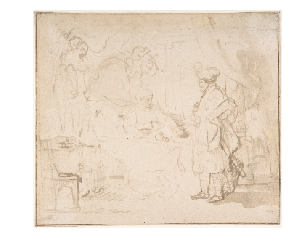

F1 score: 0.6666666666666666
F2 score: 0.5555555555555556


In [143]:
# High F1 score
idx = 10028
img_path = os.path.join(test_img_dir, ids[idx] + '.png')

# plot
pred_lab = pred_labels[idx,:]
true_lab = orig_labels[idx,:]
visualize_pred(img_path, pred_lab, true_lab, idx2class)

print('F1 score: {}'.format(f1_samples[idx]))
print('F2 score: {}'.format(f2_samples[idx]))

Predicted: culture::egyptian, tag::animals, tag::seals
Ground truth: culture::egyptian, tag::seals


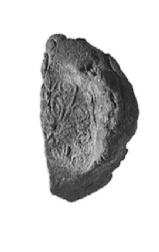

F1 score: 0.8
F2 score: 0.9090909090909091


In [145]:
# High F1 score
idx = 4113
img_path = os.path.join(test_img_dir, ids[idx] + '.png')

# plot
pred_lab = pred_labels[idx,:]
true_lab = orig_labels[idx,:]
visualize_pred(img_path, pred_lab, true_lab, idx2class)

print('F1 score: {}'.format(f1_samples[idx]))
print('F2 score: {}'.format(f2_samples[idx]))